Fashion MNSIT is available in tensorflow database.  It's total of 70000 data- with 60000 training data and 10000 test data.  It has 10 labels to identify "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot".  Used Convolution Neural Network (CNN) using Tensorflow framework to fit the training data, evaluated using test data.  Accuracy from training is 98% and from test is 90%.  Only used 1 layer with 128 neurons.

In [1]:
# libraries
import tensorflow as tf
import matplotlib.pyplot as plt
tf.__version__

'2.3.0'

In [2]:
#importing fashion_mnist data set.
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(60000,28,28,1)  # need to convert into a single 4D list that is 60,0000x28x28x1 for Convolutions
X_test = X_test.reshape(10000, 28, 28,1)  # same reason as above.
X_train = X_train / 255.0 # Normalizing
X_test = X_test / 255.0 # Normalizing

In [3]:
# Build a model

#1. Set a random seed
tf.random.set_seed(42)

#2. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),  # codes above to do convolution (that higlights image) and pooling to compress the image.
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)  # you could write like this to activate relu.
    
])

#3. Compile the model
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer= tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

#4. Fit the model
model_1.fit(X_train, y_train, epochs = 20, verbose=0)

In [4]:
#5. Evalute
model_1.evaluate(X_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.5502 - accuracy: 0.9058


[0.5502061247825623, 0.9057999849319458]

In [5]:
#4 Predict
y_probs = model_1.predict(X_test)

In [6]:
y_probs[9]

array([6.0614719e-22, 2.2148587e-23, 4.4372892e-30, 1.1029163e-22,
       4.7910852e-23, 1.1063964e-23, 1.8246934e-26, 1.0000000e+00,
       6.0337680e-21, 1.0117074e-21], dtype=float32)

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [8]:
class_names[tf.argmax(y_probs[9])]

'Sneaker'

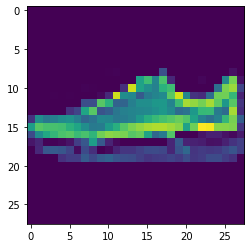

In [9]:
plt.imshow(X_test[9]);

In [10]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1